#### Import all libraries

In [1]:
from __future__ import print_function
import os
import collections
import SimpleITK as sitk
import numpy as np
import six
import radiomics
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm, getTestCase
import sys
import logging as logger
import time
import json
import os
import logging.config
import pandas as pd
import gc
import math
import openpyxl
from itertools import groupby
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
print("All the libraries are now imported.")

All the libraries are now imported.


In [3]:
#Enter the image number under investigation
num_img = 12

# Path of the images used in REV analysis
path ='D:\\Joost\\pyradiomics\\data\\trial_10\\16_bit_images\\600cubed_data{}.nrrd'.format(num_img) #data{}_m.nrrd'.format(num_img)

# Read the nrrd image using the SITK library. 
image_1_sitk = sitk.ReadImage(path)
image_1_3D = sitk.GetArrayFromImage(image_1_sitk)
image_1_1D = np.reshape(image_1_3D,(image_1_3D.size)) 
image_1 = image_1_1D.tolist()

In [5]:
#count the frequency of occurence of the graylevel intensities
counter = collections.Counter(image_1)

#the frequency of occurence of graylevel intensities
freq_number = list(counter.values())

#the percentage contribution of each of these greylevel intensities
num_voxels = image_1_3D.size
freq_percentage = [x * 100 / num_voxels for x in freq_number]

#the greylevel intensities to match the frequency percentage
graylevel = list(counter.keys())

my_df = pd.DataFrame(list(zip(graylevel, freq_number)))
name_csv = 'histogram_ketton_data12.xlsx'#.format(num_img)
my_df.to_excel(name_csv, index=True)

print("Saved histogram")

Saved histogram


Text(0.5, 1.0, 'Understanding the dominant and minor graylevel intensities')

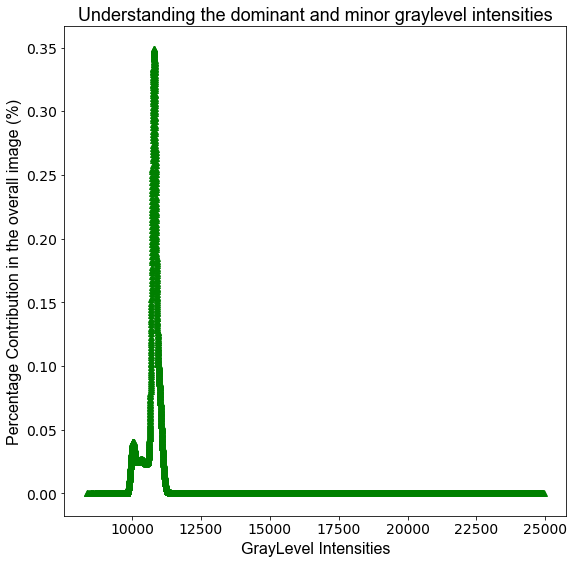

In [5]:
plt.figure(figsize=(9, 9))
plt.plot(graylevel, freq_percentage, 'g^')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('GrayLevel Intensities', fontname='Arial', fontsize=16)
plt.ylabel('Percentage Contribution in the overall image (%)', fontname='Arial', fontsize=16)
plt.title('Understanding the dominant and minor graylevel intensities', fontname='Arial', fontsize=18)
#plt.savefig('Yamin_Berea.png')

In [17]:
image = img_as_float(image_1)
hi = exposure.histogram(image)
cdf = exposure.cumulative_distribution(image)

In [19]:
hi

(array([       3,        9,       37,       75,      192,      714,
           19225,   906003, 12757528, 31566839, 16009388,  5361257,
         3770109,  3472548,  3482080,  3694998,  4355216, 10773917,
        53697616, 57305062,  8028579,   335441,    96572,    56002,
           38980,    30251,    24143,    20020,    17496,    15137,
           12982,    11462,    10394,     9247,     8663,     7708,
            7081,     6619,     6158,     5897,     5807,     5476,
            5142,     5127,     4987,     4541,     3915,     3145,
            2704,     2494,     2479,     2522,     2062,     1700,
            1636,     1553,     1672,     1642,     1632,     1529,
            1482,     1215,      966,      673,      553,      467,
             381,      372,      327,      335,      249,      249,
             240,      203,      198,      205,      184,      185,
             193,      178,      170,      186,      161,      163,
             172,      168,      164,      156, 

In [23]:
res = stats.cumfreq(image_1, numbins=1, defaultreallimits=(0, 65535))

In [24]:
res.cumcount

array([2.16e+08])

In [ ]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(image_1, bins=100)
ax1.set_title('Histogram')
ax2.bar(image_1, res.cumcount, width=res.binsize)
ax2.set_xlim([image_1.min(), image_1.max()])